# KNN - K Nearest Neighbours

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from ipynb.fs.defs.Additional_metrics import *
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from tensorflow import io, image

## Trained on 30% samples of the original training dataset

In [2]:
train_data = pd.read_csv("datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [3]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train_std, y_train, test_size=0.7, stratify=y_train, random_state=42)

In [6]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
acc = []
i, p_val = 0, 0

for k in [1,2,3,4,5,6,7,8,9,10,11]:
    for m in ['euclidean','manhattan','chebyshev','minkowski']:   
        for w in ['uniform','distance']:
            
            indexes = kf.split(X_train_30, y_train_30)
            acc_tmp = []
            time_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train_30)),len(np.unique(y_train_30))))

            for train_index, test_index in indexes:

                X_trainCV1 = X_train_30.iloc[train_index,:]
                y_trainCV1 = y_train_30.iloc[train_index]

                X_testCV1 = X_train_30.iloc[test_index,:]
                y_testCV1 = y_train_30.iloc[test_index]

                start = time.time()

                if m == 'minkowski':
                    p_val = 3
                else:
                    p_val = 2
                
                
                knn1 = KNeighborsClassifier(n_neighbors = k, metric = m, p = p_val, weights = w, n_jobs = 20)
                knn1.fit(X_trainCV1, y_trainCV1)
                y_pred1 = knn1.predict(X_testCV1)
                c1 = confusion_matrix(y_testCV1, y_pred1)

                acc_tmp.append(np.trace(c1)/sum(sum(c1)))
                fin_conf_mat += c1
                start = time.time()

                time_tmp.append(end-start)
                #print("        Accuracy: ", np.trace(c1)/sum(sum(c1)),'| Execution time:',end - start)

            print(i,'. K = ', k,', m = ', m,', w = ', w, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
            acc.append(np.mean(acc_tmp))
            i += 1
            
    print('')
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

0. K = 1, m = euclidean, w = uniform, Average accuracy: 0.81861111 | Average execution time: 1.19949012
1. K = 1, m = euclidean, w = distance, Average accuracy: 0.81861111 | Average execution time: 1.13282995
2. K = 1, m = manhattan, w = uniform, Average accuracy: 0.82916667 | Average execution time: 19.19604301
3. K = 1, m = manhattan, w = distance, Average accuracy: 0.82916667 | Average execution time: 18.98725367
4. K = 1, m = chebyshev, w = uniform, Average accuracy: 0.64627778 | Average execution time: 15.77145195
5. K = 1, m = chebyshev, w = distance, Average accuracy: 0.64627778 | Average execution time: 15.74871249
6. K = 1, m = minkowski, w = uniform, Average accuracy: 0.799 | Average execution time: 86.22457352
7. K = 1, m = minkowski, w = distance, Average accuracy: 0.799 | Average execution time: 86.80628028

8. K = 2, m = euclidean, w = uniform, Average accuracy: 0.817 | Average execution time: 1.24112554
9. K = 2, m = euclidean, w = distance, Average accuracy: 0.81861111 

78. K = 10, m = minkowski, w = uniform, Average accuracy: 0.80972222 | Average execution time: 87.34016538
79. K = 10, m = minkowski, w = distance, Average accuracy: 0.81094444 | Average execution time: 86.90657682

80. K = 11, m = euclidean, w = uniform, Average accuracy: 0.82488889 | Average execution time: 1.54096842
81. K = 11, m = euclidean, w = distance, Average accuracy: 0.82688889 | Average execution time: 1.51337438
82. K = 11, m = manhattan, w = uniform, Average accuracy: 0.8335 | Average execution time: 20.12368436
83. K = 11, m = manhattan, w = distance, Average accuracy: 0.83594444 | Average execution time: 20.16213088
84. K = 11, m = chebyshev, w = uniform, Average accuracy: 0.64922222 | Average execution time: 16.04938312
85. K = 11, m = chebyshev, w = distance, Average accuracy: 0.65638889 | Average execution time: 15.92907462
86. K = 11, m = minkowski, w = uniform, Average accuracy: 0.80788889 | Average execution time: 87.26749854
87. K = 11, m = minkowski, w = distanc

#### Checking if different algorithms speed up the process

In [14]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for a in ['ball_tree', 'kd_tree']:
    indexes = kf.split(X_train_30, y_train_30)
    acc_tmp = []
    time_tmp = []
    fin_conf_mat = np.zeros((len(np.unique(y_train_30)),len(np.unique(y_train_30))))

    for train_index, test_index in indexes:

        X_trainCV1 = X_train_30.iloc[train_index,:]
        y_trainCV1 = y_train_30.iloc[train_index]

        X_testCV1 = X_train_30.iloc[test_index,:]
        y_testCV1 = y_train_30.iloc[test_index]

        start = time.time()

        knn1 = KNeighborsClassifier(n_neighbors = 4, algorithm = a, metric = "manhattan", weights = "distance", n_jobs = 20)

        knn1.fit(X_trainCV1, y_trainCV1)
        y_pred1 = knn1.predict(X_testCV1)
        c1 = confusion_matrix(y_testCV1, y_pred1)

        acc_tmp.append(np.trace(c1)/sum(sum(c1)))
        fin_conf_mat += c1
        end = time.time()

        time_tmp.append(end-start)

    print(a,', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')

ball_tree, Average accuracy: 0.84016667 | Average execution time: 5.74329457
kd_tree, Average accuracy: 0.84016667 | Average execution time: 8.89986157


#### Training on 30% training samples, test on test dataset

In [28]:
start = time.time()

knn1 = KNeighborsClassifier(n_neighbors = 4, metric = "manhattan", weights = 'distance', n_jobs = 20)
knn1.fit(X_train_30, y_train_30)
y_pred2 = knn1.predict(X_test_std)
c2 = confusion_matrix(y_test, y_pred2, labels=[0,1,2,3,4,5,6,7,8,9])

end = time.time()
print('Accuracy without reduction:' , np.trace(c2)/sum(sum(c2)), '| Average execution time: ', end - start)

Accuracy without reduction: 0.8475 | Average execution time:  72.6139748096466


#### Checking if different algorithms speed up the process 

In [29]:
for a in ['ball_tree', 'kd_tree']:
    start = time.time()

    knn1 = KNeighborsClassifier(n_neighbors = 4, metric = "manhattan", weights = 'distance', algorithm = a, n_jobs = 20)
    knn1.fit(X_train_30, y_train_30)
    y_pred2 = knn1.predict(X_test_std)
    c2 = confusion_matrix(y_test, y_pred2, labels=[0,1,2,3,4,5,6,7,8,9])

    end = time.time()
    print(a, ', Accuracy without reduction:' , np.trace(c2)/sum(sum(c2)), '| Average execution time: ', end - start)

ball_tree , Accuracy without reduction: 0.8475 | Average execution time:  19.211456060409546
kd_tree , Accuracy without reduction: 0.8475 | Average execution time:  32.06991147994995


.

## Trained on 100% samples of the original training dataset

In [31]:
train_data = pd.read_csv("datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [32]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
     
indexes = kf.split(X_train, y_train)
acc_tmp = []
time_tmp = []
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

for train_index, test_index in indexes:
    
    X_trainCV2 = X_train_std.iloc[train_index,:]
    y_trainCV2 = y_train.iloc[train_index]
    
    X_testCV2 = X_train_std.iloc[test_index,:]
    y_testCV2 = y_train.iloc[test_index]

    start = time.time()

    knn2 = KNeighborsClassifier(n_neighbors = 4, metric = "manhattan", weights = "distance", algorithm = 'ball_tree',  n_jobs = 20)
    knn2.fit(X_trainCV2, y_trainCV2)
    y_pred3 = knn2.predict(X_testCV2)
    c3 = confusion_matrix(y_testCV2, y_pred3)

    acc_tmp.append(np.trace(c3)/sum(sum(c3)))
    fin_conf_mat += c3
    end = time.time()

    time_tmp.append(end-start)
    print("        Accuracy: ", np.trace(c3)/sum(sum(c3)),'| Execution time:',end - start)
    
print("")    
print('-------------------')
print('Average accuracy:', np.mean(acc_tmp),'| Average execution time:',np.mean(time_tmp))    

        Accuracy:  0.8645 | Execution time: 89.8206193447113
        Accuracy:  0.8643333333333333 | Execution time: 90.1979615688324
        Accuracy:  0.86525 | Execution time: 90.001784324646
        Accuracy:  0.8663333333333333 | Execution time: 90.09033679962158
        Accuracy:  0.863 | Execution time: 68.5863242149353

-------------------
Average accuracy: 0.8646833333333334 | Average execution time: 85.73940525054931


##### Training on 100% training samples, test on test dataset

In [33]:
start = time.time()

knn2 = KNeighborsClassifier(n_neighbors = 4, metric = "manhattan", weights = "distance", algorithm = 'ball_tree', n_jobs = 20)
knn2.fit(X_train_std, y_train)
y_pred4 = knn2.predict(X_test_std)
c4 = confusion_matrix(y_test, y_pred4, labels=[0,1,2,3,4,5,6,7,8,9])

end = time.time()
print('Accuracy without reduction:', np.trace(c4)/sum(sum(c4)), '| Execution time:', end - start)

Accuracy without reduction: 0.8706 | Execution time: 75.81088852882385


.

## Trained on 100% samples with PCA reduction

In [4]:
train_data = pd.read_csv("datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [46]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i, p_val = 0, 0

for k in [1,2,3,4,5,6,7,8,9,10,11]:
    for m in ['euclidean','manhattan','chebyshev']:   
        for w in ['distance']:
            for pc in [0.8, 0.85, 0.9, 0.95]:
            
                if m == 'minkowski':
                    p_val = 3
                else:
                    p_val = 2

                indexes = kf.split(X_train, y_train)
                acc_tmp = []
                time_tmp = []
                fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

                for train_index, test_index in indexes:

                    X_trainCV3 = X_train_std.iloc[train_index,:]
                    y_trainCV3 = y_train.iloc[train_index]

                    X_testCV3 = X_train_std.iloc[test_index,:]
                    y_testCV3 = y_train.iloc[test_index]

                    pca = PCA(n_components=pc)
                    pca.fit(X_trainCV3)
                    X_train_r = pca.transform(X_trainCV3)
                    X_test_r = pca.transform(X_testCV3)

                    start = time.time()

                    knn3 = KNeighborsClassifier(n_neighbors = k, metric = m, p = p_val, weights = w, n_jobs = 20)
                    knn3.fit(X_train_r, y_trainCV3)
                    y_pred5 = knn3.predict(X_test_r)
                    c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

                    acc_tmp.append(np.trace(c5)/sum(sum(c5)))
                    fin_conf_mat += c5
                    end = time.time()

                    time_tmp.append(end-start)
                    #print("        Accuracy: ", np.trace(c5)/sum(sum(c5)),'| Execution time:',end - start)

                print(i,'. pca = ', pc,', K = ', k,', m = ', m,', w = ', w, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
                acc.append(np.mean(acc_tmp))
                i += 1
            
            print('')
            
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

0. pca = 0.8, K = 1, m = euclidean, w = distance, Average accuracy: 0.83573333 | Average execution time: 7.81550183
1. pca = 0.85, K = 1, m = euclidean, w = distance, Average accuracy: 0.84471667 | Average execution time: 7.79468307
2. pca = 0.9, K = 1, m = euclidean, w = distance, Average accuracy: 0.8495 | Average execution time: 7.98725748
3. pca = 0.95, K = 1, m = euclidean, w = distance, Average accuracy: 0.85103333 | Average execution time: 8.53355465

4. pca = 0.8, K = 1, m = manhattan, w = distance, Average accuracy: 0.84098333 | Average execution time: 7.60751281
5. pca = 0.85, K = 1, m = manhattan, w = distance, Average accuracy: 0.84836667 | Average execution time: 9.86056056
6. pca = 0.9, K = 1, m = manhattan, w = distance, Average accuracy: 0.85498333 | Average execution time: 12.44650908
7. pca = 0.95, K = 1, m = manhattan, w = distance, Average accuracy: 0.85443333 | Average execution time: 40.53563433

8. pca = 0.8, K = 1, m = chebyshev, w = distance, Average accuracy: 

70. pca = 0.9, K = 6, m = chebyshev, w = distance, Average accuracy: 0.84248333 | Average execution time: 14.94377913
71. pca = 0.95, K = 6, m = chebyshev, w = distance, Average accuracy: 0.84235 | Average execution time: 47.36463957

72. pca = 0.8, K = 7, m = euclidean, w = distance, Average accuracy: 0.8562 | Average execution time: 11.92823939
73. pca = 0.85, K = 7, m = euclidean, w = distance, Average accuracy: 0.86205 | Average execution time: 12.02933059
74. pca = 0.9, K = 7, m = euclidean, w = distance, Average accuracy: 0.86356667 | Average execution time: 12.22310715
75. pca = 0.95, K = 7, m = euclidean, w = distance, Average accuracy: 0.86256667 | Average execution time: 12.8304594

76. pca = 0.8, K = 7, m = manhattan, w = distance, Average accuracy: 0.86085 | Average execution time: 10.9597589
77. pca = 0.85, K = 7, m = manhattan, w = distance, Average accuracy: 0.86613333 | Average execution time: 12.1700583
78. pca = 0.9, K = 7, m = manhattan, w = distance, Average accurac

#### Checking if different algorithms speed up the process

In [51]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for a in ['ball_tree', 'kd_tree']:

    indexes = kf.split(X_train, y_train)
    acc_tmp = []
    time_tmp = []
    fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

    for train_index, test_index in indexes:

        X_trainCV3 = X_train_std.iloc[train_index,:]
        y_trainCV3 = y_train.iloc[train_index]

        X_testCV3 = X_train_std.iloc[test_index,:]
        y_testCV3 = y_train.iloc[test_index]

        pca = PCA(n_components = 0.9)
        pca.fit(X_trainCV3)
        X_train_r = pca.transform(X_trainCV3)
        X_test_r = pca.transform(X_testCV3)

        start = time.time()

        knn3 = KNeighborsClassifier(n_neighbors = 6, algorithm = a, metric = "manhattan", weights = "distance", n_jobs = 20)
        knn3.fit(X_train_r, y_trainCV3)
        y_pred5 = knn3.predict(X_test_r)
        c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

        acc_tmp.append(np.trace(c5)/sum(sum(c5)))
        fin_conf_mat += c5
        end = time.time()

        time_tmp.append(end-start)

    print(a,', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')

ball_tree, Average accuracy: 0.8691 | Average execution time: 19.48031311
kd_tree, Average accuracy: 0.8691 | Average execution time: 24.33771577


##### Training on 100% training samples with PCA reduction, test on test dataset

In [5]:
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)

start = time.time()

knn3 = KNeighborsClassifier(n_neighbors = 6, algorithm = "ball_tree", metric = "manhattan", weights = "distance", n_jobs = 20)
knn3.fit(X_train_r, y_train)
y_pred6 = knn3.predict(X_test_r)
c6 = confusion_matrix(y_test, y_pred6, labels=[0,1,2,3,4,5,6,7,8,9])

end = time.time()
print('Accuracy without reduction:', np.trace(c6)/sum(sum(c6)), '| Execution time:', end - start)

Accuracy without reduction: 0.8732 | Execution time: 21.201920747756958


In [60]:
print(c6)

[[852   1  13  16   5   0 107   1   4   1]
 [  4 974   0  15   2   0   5   0   0   0]
 [ 16   2 764  13 112   1  91   0   1   0]
 [ 28   5   7 901  35   0  24   0   0   0]
 [  1   0  57  20 834   0  87   0   1   0]
 [  1   0   0   0   0 892   4  61   3  39]
 [164   1  72  24  72   1 658   0   8   0]
 [  0   0   0   0   0  11   0 937   0  52]
 [  4   1   6   1   7   1  13   4 960   3]
 [  0   0   0   0   0   4   1  35   0 960]]


In [61]:
print(accuracy_per_class(c6, y_test.unique()))

For class 0 accuracy is: 0.9634
For class 1 accuracy is: 0.9964
For class 2 accuracy is: 0.9609
For class 3 accuracy is: 0.9812
For class 8 accuracy is: 0.9601
For class 6 accuracy is: 0.9874
For class 5 accuracy is: 0.9326
For class 4 accuracy is: 0.9836
For class 7 accuracy is: 0.9943
For class 9 accuracy is: 0.9865
-------------
0.9746399999999997


In [62]:
print(sensitivity_per_class(c6, y_test.unique()))

For class 0 sensitivity is: 0.852
For class 1 sensitivity is: 0.974
For class 2 sensitivity is: 0.764
For class 3 sensitivity is: 0.901
For class 8 sensitivity is: 0.834
For class 6 sensitivity is: 0.892
For class 5 sensitivity is: 0.658
For class 4 sensitivity is: 0.937
For class 7 sensitivity is: 0.96
For class 9 sensitivity is: 0.96
-------------
0.8732


## Examples of wrong classification

In [20]:
y_pred_np = y_pred6
print(type(y_pred6))

y_test_np = y_test.to_numpy()
print(type(y_test_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
def differences(a,b):
    list = []
    for j in range(len(a)):
        if b[j] != a[j]:
            list = list + [j]        
    arrayIndexes = np.asarray(list)
    return arrayIndexes

In [22]:
diff = differences(y_pred_np, y_test_np)
print(diff[:9])

[ 5  7 19 38 40 41 51 59 73]


In [23]:
from PIL import Image

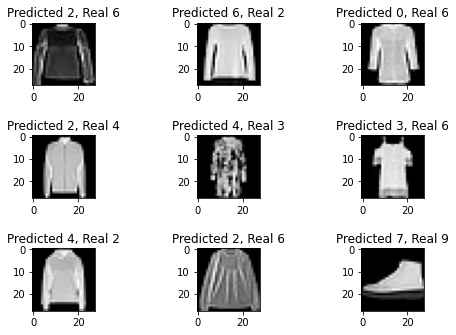

In [49]:
for j in range(0,9):  
    plt.subplot(3,3,j+1)    
    arr = X_test.iloc[diff[j+100],:].to_numpy()
    arr = arr.reshape(28,28)
    
    plt.subplots_adjust(left=-0.1,
                    bottom=-0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.8)
    
    plt.imshow(arr, cmap = 'gray')
    plt.title("Predicted {}, Real {}".format(y_pred_np[diff[j+100]], y_test_np[diff[j+100]]))